In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from data import combine_with_reverb, create_bertified_dataset
from utils import read_data
from copy import copy
import numpy as np 
from collections import Counter
from data import read_reverb
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
# if using a Jupyter notebook, includue:
%matplotlib inline

DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
reverb_lines = read_reverb('../data/reverb_wikipedia_tuples-1.1.txt')
questions = pd.read_excel(r'../data/Final_Sheet_990824.xlsx', sheet_name=1, engine='openpyxl')

In [3]:
reverb_lines[0]

['625',
 '$ 10',
 'was deducted for',
 'board',
 '$ 10',
 'be deduct for',
 'board',
 '1',
 '0.95320',
 'http://en.wikipedia.org/wiki/Danbury_and_Norwalk_Railroad']

In [4]:
def get_tuple_frequency(dataset_lines, questions):
    # indexing 
    index = {}
#     tqdm(test_df.iterrows(), total=test_df.shape[0])
    for idx, line in tqdm(enumerate(dataset_lines), total=len(dataset_lines), desc='Indexing ...'):
        left = line[4]+'|'+line[5]
        right = line[5]+'|'+line[6]
        for item in [left, right]:
            if item in index:
                index[item]+=1
            else:
                index[item]=1
#     frequency = lambda row:row['Reverb_no']
    frequencies = []
    for idx, row in tqdm(questions.iterrows(), total=questions.shape[0], desc='Filtering ...'):
        reverb_number = row['Reverb_no']
        left = dataset_lines[reverb_number][4]+'|'+dataset_lines[reverb_number][5]
        right = dataset_lines[reverb_number][5]+'|'+dataset_lines[reverb_number][6]
        frequency = max(index[left], index[right])
        frequencies.append(frequency)
    
    questions['Frequency']=frequencies
    return questions
        

In [5]:
index = get_tuple_frequency(reverb_lines, questions)

Filtering ...: 100%|███████████████████████████████████████████████████████████| 20166/20166 [00:02<00:00, 9275.99it/s]


In [6]:
index[(index['Frequency']<10)&(index['Meaningful']==1)]

,Meaningful,Reverb_no,Sentecne,Confidence,Question,Answer,Frequency
0,1,0,$ 10 was deducted for board,0.95320,How much money was deducted for board,10,1
2,1,85,1 is for an eye,0.93349,What is for an eye,1,1
4,1,150,1 Senators are appointed to represent Manitoba,0.94697,how many are appointed to represent Manitoba,1 Senators,9
7,1,285,1.10pm marks the start of lunchtime,0.93349,What time marks the start of lunchtime,1.10pm,1
8,1,300,1.3 Governments do not supply money,0.90925,What do not supply money,1.3 Governments,2
...,...,...,...,...,...,...,...
20160,1,399731,prospective students must submit a portfolio o...,0.91363,what must prospective students submit,a portfolio of short writing,1
20162,1,399829,racing was just a hobby for Cope,0.93076,for whom was racing just a hobby,for Cope,1
20163,1,399850,raids were made against Fort Harrison,0.91575,against what were raids made,against Fort Harrison,1
20164,1,399885,real life took over for a bit,0.93349,how long did real life take over,for a bit,1


(array([12268.,  1624.,   806.,   544.,   402.,   370.,   314.,   206.,
          176.]),
 array([1.        , 1.88888889, 2.77777778, 3.66666667, 4.55555556,
        5.44444444, 6.33333333, 7.22222222, 8.11111111, 9.        ]),
 <BarContainer object of 9 artists>)

DEBUG:matplotlib.font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal 700 normal>) = 1.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans' (DejaVuSans-Bold.ttf) normal normal 700 normal>) = 0.

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia' (georgiaz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Malgun Gothic' (malgunbd.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Javanese Text' (javatext.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal 350 normal>) = 11.0975
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bahnschrift' (bahnschrift.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (timesi.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Yu Gothic' (YuGothR.ttc) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Console' (lucon.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft YaHei'

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Courier New' (couri.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Corbel' (corbelz.ttf) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Nirmala UI' (NirmalaS.ttf) normal normal 350 normal>) = 10.0975
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (segoeuib.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Simplified Arabic' (simpbdo.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MT Extra' (MTEXTRA.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Book Antiqua' (ANTQUAI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Book Antiqua' (ANTQUABI.TTF) italic normal 700 normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Aldhabi' (aldhabi.ttf) n

DEBUG:matplotlib.font_manager:findfont: score(<Font 'MS Reference Sans Serif' (REFSAN.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Palatino Linotype' (palai.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bookman Old Style' (BOOKOSB.TTF) normal normal 600 normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gadugi' (gadugib.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft New Tai Lue' (ntailub.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Myanmar Text' (mmrtextb.ttf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI Historic' (seguihis.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:find

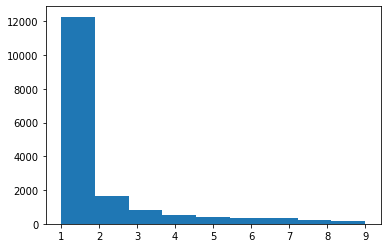

In [10]:
plt.hist(index[(index['Frequency']<10)&(index['Meaningful']==1)]['Frequency'].to_list(), 9)

In [11]:
index[index['Meaningful']==1].to_excel('../data/normalized_questions.xlsx')